# Clustering

## Segment Customers

Segment customers into different groups based on their shopping trends.

In [ ]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [ ]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
#display(shopping_data.head())

# TODO: retain only anual_income and spending_score for clustering
shopping_data_2d=shopping_data.iloc[:,3:5]
display(shopping_data_2d)

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
#Missing values computation
shopping_data_2d.isnull().sum()


annual_income     0
spending_score    0
dtype: int64

### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.



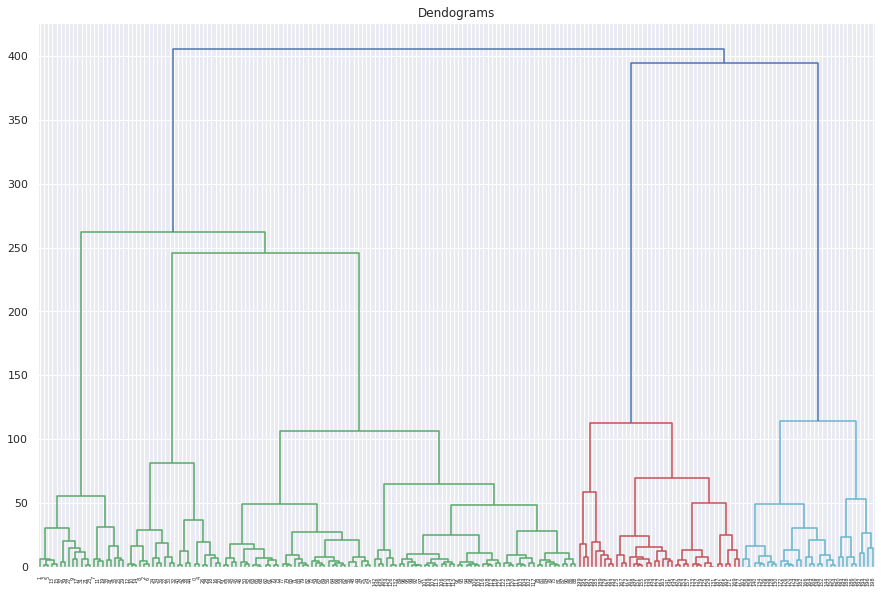

In [ ]:
# TODO
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(shopping_data_2d, method='ward'))  

Based on above dendrogram we can see optimized number of clusters in this case would be 5.


**Apply hierarchical clustering based on the number of clusters picked up  from the dendrogram, and visualize the results using scatterplot.**

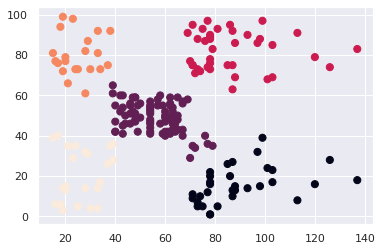

In [ ]:
# TODO
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_ward = hc.fit_predict(shopping_data_2d)  

plt.scatter(shopping_data_2d.iloc[:, 0], shopping_data_2d.iloc[:, 1], c=y_ward, s=50)

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

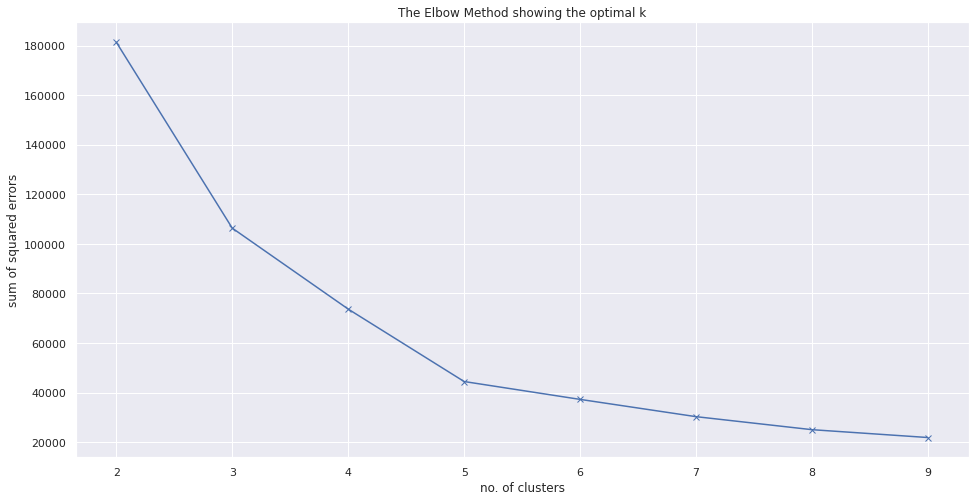

In [ ]:
# TODO
from sklearn.cluster import KMeans
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=0)
    kmeanModel.fit(shopping_data_2d)
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('no. of clusters')
plt.ylabel('sum of squared errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Optimal number of clusters based on above curve is 5

**Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot. **

In [ ]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(shopping_data_2d)

print(y_kmeans)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


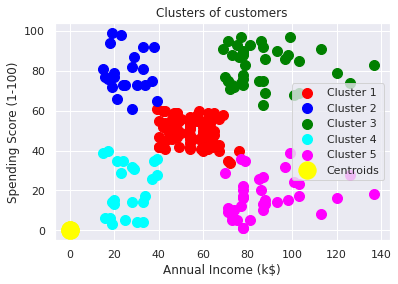

In [ ]:
#Visualizing all the clusters 

plt.scatter(shopping_data_2d.iloc[y_kmeans == 0, 0], shopping_data_2d.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(shopping_data_2d.iloc[y_kmeans == 1, 0], shopping_data_2d.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(shopping_data_2d.iloc[y_kmeans == 2, 0], shopping_data_2d.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(shopping_data_2d.iloc[y_kmeans == 3, 0], shopping_data_2d.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(shopping_data_2d.iloc[y_kmeans == 4, 0], shopping_data_2d.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

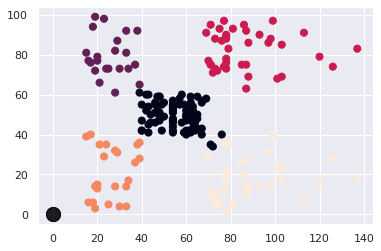

In [ ]:

plt.scatter(shopping_data_2d.iloc[:, 0], shopping_data_2d.iloc[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## Clustering (Manually)

For the following dataset, i will also perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

I am going to pick 28,80 and 167 as initial centers and name them as cluster 1,cluster 2 and cluster 3.

Calculating distance of each observation from these centers

**Ist iteration**-

**Assignments of points to new clusters**

17,50 belong to cluster 1 with center at 28

60,89 belong to cluster2 with center at 80

150,171 and 189 belong to cluster3 with center at 167

**2nd iteration**

**Updating centers for each cluster(New centers)**

cluster 1 new center= (17+50+28)/3=31.6

cluster 2 new center= (60+89+80)/3=76.3

cluster 3 new center= (150+171+189+167)/4=169.25

**Assignments of points to new clusters**

17,28,50 belong to cluster1

60,80,89 belong to cluster 2

150,167,171,189 belong to cluster 3

**3rd iteration**

**Updating centers for each cluster**

cluster 1 new center= (17+50+28)/3=31.6

cluster 2 new center= (60+89+80)/3=76.3

cluster 3 new center= (150+171+189+167)/4=169.25

No further change in centroids that means our model has reached convergence.

Final cluster are cluster 1- (17,28,50), cluster 2- (60,80,89), cluster3- (150,167,171,189)



In single link hierarchical clustering, we merge in each step the two clusters, whose two closest members have the smallest distance.

17,28,50,60,80,89,150,167,171,189

**First step**-

We will calculate distances between these points,ignore signs

17-28=11, 28-50=22,50-60=10,60-80=20,80-89=9,89-150=61,150-167=17,167-171=4,171-189=18

Upon calculating distances,  we observe that the points 167 and 171 are the closest with distance of only 4. Therefore , we will merge these two first .

Next i will calculate distance of each cluster from this new cluster and then merge closest clusters.

**2nd step**- merge 80 and 89 with second min distance of 9

**3rd step** - merge 50 and 60 with third min distance of 10

**4th step-** merge 17 and 28 with a fourth min diatnce of 11

**5th step**- merge 150 and (167,171) with 5th min distance of 17

**6th step**- merge 189 and (150,167,171) with 6th min distance of 18

**7th step**- merge (50,60) and (80,89) with a 7th min distance of 20

**8th step**- merge (17,28) and (50,60,80,89) with 8th min distance of 22

**9th step**- merge (17,28,50,60,80,89) and (150,167,171,189) having a distance of 61 to create one final cluster (17,18,50,60,80,89,150,167,171,189)

Optimal number of clusters is 2

Cluster 1 has 17, 28,50,60,80,89

Cluster 3 has 150,167,171,189



In complete link hierarchical clustering, we merge in the members of clusters in each step ,which provide the smallest maximum pairwise distance.

17,28,50,60,80,89,150,167,171,189

**Note: **I will be higlighting updated distances between new clusters and neigbouring data points/clusters only since the data is 1D array in increasing order.

**First step**-

We will calculate distances between these points,ignore signs

17-28=11, 28-50=22,50-60=10,60-80=20,80-89=9,89-150=61,150-167=17,167-171=4,171-189=18

Upon calculating distances,  we observe that the points 167 and 171 are the closest with distance of only 4. Therefore , we will merge these two first .

Next i will calculate distance of each cluster from this new cluster and then merge closest clusters.

17-28=11, 28-50=22,50-60=10,60-80=20,80-89=9,89-150=61 - These remains same

while distance of 150 and 189  from new cluster (167,171) gets updated

150-(167,171)=21

(167,171)-189=22

**2nd step**- merge 80 and 89 with second min distance of 9

update distances-

60 -(80,89)=29
(80,89)-150=70

**3rd step** - merge 50 and 60 with third min distance of 10

update distances-

(50,60)-(80,89)=39
(50,60)-28=32

**4th step-** merge 17 and 28 with a fourth min diatnce of 11

update distances-

(50,60)-(17,28)=43

**5th step**- merge 150 and (167,171) with 5th min distance of 21

update distances-

(150,167,171)-(189)=39
(150,167,171)-(80,89)=91

**6th step**- merge a)189 and (150,167,171) 

  b) (50,60) with (80,89)
  with 6th min distance of 39

  update distances-

  (17,28)-(50,60,80,89)=72
  (50,60,80,89)-(150,167,171,189)=139

**7th step**- merge (17,28) and (50,60,80,89)  with a distance of 72

update distance

(17,28,50,60,80,89)-(150,167,171,189)=172

**8th step**- merge (17,28,50,60,80,89),(150,167,171,189) to create one final cluster (17,18,50,60,80,89,150,167,171,189)

Optimal number of clusters is 3

Cluster 1 has 17, 28

cluster 2 has 50,60,80,89

Cluster 3 has 150,167,171,189



Upon calculating distance of each point from centers-

**1st iteration**

17,28,50,60,80,89 belong to cluster 1 with center 150

167 belong to cluster 2 with center 171

Cluster 3 has only 189

**2nd iteration**- Updating centers

(17+28+50+60+80+89+150)/7=67.71

Cluster 1 new center 67.71

(167+171)/2=169

Cluster 2 new center 169

(189)/1=189

Cluster 3 center 189

**Assignment** of points to new centers

Cluster 1 points- 17,28,50,60,80,89 with centers at 67.71

Cluster 2 points - 150 ,167,171 with center at 169

Cluster 3 points 189 with center at 189


**3rd iteration**  Updating cluster centers

Cluster 1 (17+28+50+60+80+89)/6=54

cluster 1 new center - 54

Cluster2 (150+167+171)/3=162.2

cluster 2 new center=162.2

Cluster 3 189

**Assignment** of points to new centers


Cluster 1 points-(17,28,50,60,80,89) , center - 54

Cluster 2 - (150,167,171), center-162.2

Cluster 3- (189), center- 189





## Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. Using paper title or abstract to build features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

In [ ]:
# Load the Relevant libraries
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")
#aaai_data

# TODO
#extracting title column
aaai_sub=aaai_data.iloc[:,0]
aaai_sub.head(10)


0                Kernelized Bayesian Transfer Learning
1    "Source Free" Transfer Learning for Text Class...
2    A Generalization of Probabilistic Serial to Ra...
3           Lifetime Lexical Variation in Social Media
4    Hybrid Singular Value Thresholding for Tensor ...
5                          Locality Preserving Hashing
6    Discovering Better AAAI Keywords via Clusterin...
7       Online Classification Using a Voted RDA Method
8    Fraudulent Support Telephone Number Identifica...
9    Supervised Hashing for Image Retrieval via Ima...
Name: title, dtype: object

In [ ]:
# TfidfVectorizer to extract features and assign weights

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# set of documents
aaai_sub

# instantiate the vectorizer object

tfidfvectorizer = TfidfVectorizer(max_df=.5,analyzer='word',stop_words= 'english')
# convert the documents into a matrix

tfidf_wm = tfidfvectorizer.fit_transform(aaai_sub)
#retrieve the terms found in the corpora

tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)

print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


TD-IDF Vectorizer

      13  aaai  abduction  abox  ...  world  wormhole  worst      zero
0    0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.000000
1    0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.000000
2    0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.000000
3    0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.000000
4    0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.000000
..   ...   ...        ...   ...  ...    ...       ...    ...       ...
393  0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.000000
394  0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.000000
395  0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.000000
396  0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.507595
397  0.0   0.0        0.0   0.0  ...    0.0       0.0    0.0  0.000000

[398 rows x 1265 columns]


<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

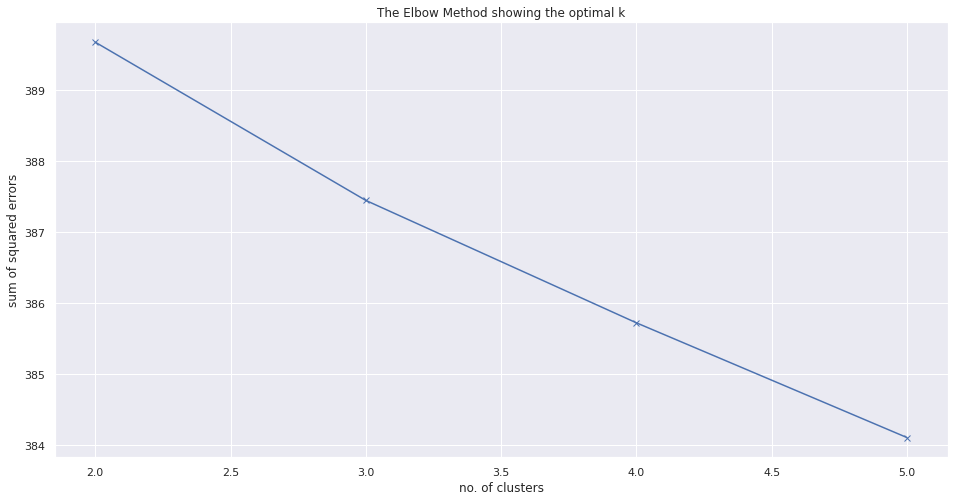

In [ ]:
#plotting an elbow curve to identify the optimal number of clusters
from sklearn.cluster import KMeans
distortions = []
K = range(2,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=0)
    kmeanModel.fit(df_tfidfvect)
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('no. of clusters')
plt.ylabel('sum of squared errors')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the curve, we can see that the optimal number of clusters would be 3

In [ ]:
# predicting clusters for each observation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_tfidfvect)
y_kmeans = kmeans.predict(df_tfidfvect)
print(y_kmeans)

[1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 2 2 0 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 2 1 0 0 0 0 0 2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 2 0 0 2 0 0 0 2 0 0 0 2 2 1 1 2 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 2 0 2
 0 2 0 0 0 2 0 1 1 0 0 1 0 0 0 0 2 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 0 0 2
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 0 1 1 0 0 2
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 2 2 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 2 0 0 2 0 0 0 2 1 0 0 0 0 0 0 0 1 2 0 0 0 1 0 0 0 0 1 2 0 2 0
 0 0 1 0 0 0 1 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 0 2 0 0
 0 0 2 0 0 0 0 0 0 0 0 1 1 0 1 1 0 2 1 0 0 0 1 0 0 0 0 2]


In [ ]:
# clusters with their  top 10 high freq words
number_of_clusters = 3
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvectorizer.get_feature_names()
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 based
 using
 planning
 search
 model
 social
 games
 linear
 information
 online
Cluster 1:
 learning
 transfer
 sparse
 bayesian
 active
 metric
 models
 data
 classification
 robust
Cluster 2:
 multi
 analysis
 supervised
 view
 learning
 feature
 task
 image
 label
 sparse


Cluster 0 is about social media analysis.

Cluster 1 seems to be about bayesian models and data classification.

Cluster 2 looks like its about supervized learning for image data.